## Imbalanced_Classes

### Steps to take
<font color='grey'>step 1: Import all the necessary python packages</font><br>
<font color='grey'>step 2: Obtain and clean data</font> <br>
<font color='grey'>step 3: Data Exploration</font> <br>
<font color='grey'>step 4: Modify data for Machine Learning</font><br>
<font color='grey'>step 5: Get dummies</font><br>
<font color='grey'>step 6: Split data into train and test</font><br> 
step 6: Standard scaling<br>
step 7: Dealing with Imbalanced Data:
- Logistic Regression "class_weight" parameter
- SMOTE (oversampling)
- Undersampling

step 8: logistic regression<br>
<font color='grey'>step 9: parameter tuning</font><br>
<font color='grey'>step 10: provide actionable recommendations</font><br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rc('font', size=14)
import seaborn as sns 
# sns.set(style='white')
# sns.set(style='whitegrid', color_codes=True)

#Machine Learning Modules
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc#, classifiction_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
# from yellowbrick.classifier import ConfusionMatrix
# ignore warnings
import warnings; warnings.simplefilter('ignore')

# autoreload 
%load_ext autoreload
%autoreload 2

#logistic regression script
import logistic_regression

In [6]:
## Load Train data from data/Train
Train = pd.read_csv('data/Train.csv',)
X_train = Train.drop('target', axis = 1)
y_train = Train['target']

## Step 6: Standard Scaling

As we seen from the data, our dataset is not standardize. So, we use ```StandardScaler()``` from ```sklearn.preprocessing```

In [7]:
# Standardizing our dataset
scaler = StandardScaler().fit(X_train)
columns = X_train.columns

scaled_train = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(scaled_train, columns=columns)

print("Dataset:", X_train_scaled.shape)
X_train_scaled.head()

Dataset: (32940, 45)


,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.293135,-0.564625,-0.19645,1.679762,-0.539824,-0.191649,-0.165773,-0.273916,-0.209108,-0.190026,...,-0.709185,-0.333783,-0.129585,-0.119922,-0.511124,-0.515608,-0.494967,-0.494729,-2.511053,-0.186655
1,-0.676809,-0.204519,-0.19645,-0.350523,-0.539824,-0.191649,-0.165773,-0.273916,-0.209108,-0.190026,...,-0.709185,-0.333783,-0.129585,-0.119922,-0.511124,-0.515608,2.020338,-0.494729,0.398239,-0.186655
2,-0.676809,-0.564625,-0.19645,-0.350523,-0.539824,-0.191649,-0.165773,-0.273916,-0.209108,-0.190026,...,-0.709185,-0.333783,-0.129585,-0.119922,-0.511124,-0.515608,2.020338,-0.494729,0.398239,-0.186655
3,-0.197216,0.155587,-0.19645,-0.350523,-0.539824,-0.191649,-0.165773,-0.273916,-0.209108,-0.190026,...,-0.709185,-0.333783,-0.129585,-0.119922,1.956473,-0.515608,-0.494967,-0.494729,0.398239,-0.186655
4,0.090540,-0.564625,-0.19645,-0.350523,-0.539824,-0.191649,-0.165773,-0.273916,-0.209108,-0.190026,...,-0.709185,-0.333783,-0.129585,-0.119922,1.956473,-0.515608,-0.494967,-0.494729,0.398239,-0.186655


## Step 7: Handling imbalanced classes
Imbalanced classes are a common problem in machine learning classification. Our classification set for instance has 89% 'No' and 11% 'yes'. We do two ways to handle the imbalanced class problem in this project. 

## Step 7.1: Using SMOTE 
Here we try to up-sample the subscription class (minority) using the SMOTE algorithm(Synthetic Minority Oversampling Techique).<br>
It works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


In [8]:
# from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=19)
os_data_X, os_data_y = os.fit_sample(X_train_scaled, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_y=os_data_y.reshape(-1, 1)

# check the numbers
print('Length of oversampled data is', len(os_data_X))
print('Number of no subscription in oversampled data', np.sum(os_data_y==0))
print('Number of subscription', np.sum(os_data_y==1))
print('Proportion of no subscription data in oversampled data is', np.sum(os_data_y==0)/len(os_data_y))
print('Proportion of subscription data in oversampled data is', np.sum(os_data_y==1)/len(os_data_y))

Length of oversampled data is 58458
Number of no subscription in oversampled data 29229
Number of subscription 29229
Proportion of no subscription data in oversampled data is 0.5
Proportion of subscription data in oversampled data is 0.5


check `sns.countplot()` to see if we successfully balanced the class imbalance issue

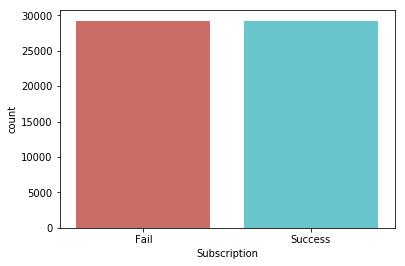

In [9]:
c=sns.countplot(x=os_data_y, palette='hls')#, data=bank_clean, palette='hls', )
plt.xlabel('Subscription')
c.set_xticklabels(['Fail','Success']);
# plt.savefig('img/count_plot_SMOTE')

In [10]:
# Perform vanilla logistic regression
logreg_base_SMOTE = LogisticRegression(C = 1e9, solver='newton-cg')
logreg_base_SMOTE.fit(os_data_X, os_data_y)
y_hat_base_SMOTE = logreg_base_SMOTE.predict(os_data_X)

print(f"score = {np.round(logreg_base_SMOTE.score(os_data_X, os_data_y),3)}")
logistic_regression.print_metrics(os_data_y, y_hat_base_SMOTE)

score = 0.708
Precision = 0.754
Recall = 0.617
Accuracy = 0.708
f1 score = 0.679


## Step 7.2: Using under-sampling technique
The second method we tried to see is under-sampling. This technique under-samples the majority class randomly and balance the majority and the minority class. 

In [11]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train_scaled, y_train], axis=1)
X.head()
# separate minority and majority classes
success = X[X.target==1]
failure = X[X.target==0]
print(f"success original count: {len(success)}")
print(f"failure original count: {len(failure)}")

# downsample majority
failure_downsampled = resample(failure,
                               replace = False, # sample without replacement
                               n_samples = len(success), # match minority n
                               random_state = 19) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([failure_downsampled, success])

# checking counts
downsampled.target.value_counts()

success original count: 3711
failure original count: 29229


1    3711
0    3711
Name: target, dtype: int64

In [12]:
# Trying vanilla logistic regression again with the balanced dataset
y_train_undersample = downsampled['target']
X_train_undersample = downsampled.drop('target', axis=1)

downsampled_lr = LogisticRegression(C = 1e9, solver='newton-cg', max_iter=1000)
downsampled_lr.fit(X_train_undersample, y_train_undersample)

downsampled_pred = downsampled_lr.predict(X_train_undersample)

print(f"score = {np.round(downsampled_lr.score(X_train_undersample, y_train_undersample), 3)}")
logistic_regression.print_metrics(y_train_undersample, downsampled_pred)

score = 0.701
Precision = 0.767
Recall = 0.578
Accuracy = 0.701
f1 score = 0.659


The model score is slightly lower compared to SMOTE. <br>
The metric scores are about the same compared to SMOTE but SMOTE looks slightly better

##  Step 8: Recursive Feature Elimination (RFE)
almost all the features are categorical data. We did feature selection to only keep some of the dummied features that will really affect our logistic regression. 

In [13]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y)
col_list = zip(os_data_X.columns, rfe.support_)
X_new_cols = [x[0] for x in col_list if x[1]==True]
# print(X_new_cols)
X_new = os_data_X[X_new_cols]
print(X_new.shape)
X_new.head()

(58458, 10)


,campaign,pdays,job_retired,default_unknown,contact_telephone,month_aug,month_jul,month_may,month_nov,poutcome_nonexistent
0,-0.564625,-0.19645,-0.209108,-0.515042,-0.757855,-0.420234,-0.459331,-0.709185,-0.333783,-2.511053
1,-0.204519,-0.19645,-0.209108,-0.515042,-0.757855,-0.420234,2.177080,-0.709185,-0.333783,0.398239
2,-0.564625,-0.19645,-0.209108,-0.515042,1.319514,-0.420234,2.177080,-0.709185,-0.333783,0.398239
3,0.155587,-0.19645,-0.209108,-0.515042,1.319514,-0.420234,-0.459331,-0.709185,-0.333783,0.398239
4,-0.564625,-0.19645,-0.209108,-0.515042,-0.757855,-0.420234,2.177080,-0.709185,-0.333783,0.398239


In [14]:
# Try applying new feature list into vanilla regression
rfe_lr = LogisticRegression(C = 1e9, solver='newton-cg', max_iter=1000)
rfe_lr.fit(X_new, os_data_y)
rfe_pred = rfe_lr.predict(X_new)

print(f"score = {np.round(rfe_lr.score(X_new, os_data_y), 3)}")
rfe_lst = logistic_regression.print_metrics(os_data_y, rfe_pred)

score = 0.694
Precision = 0.745
Recall = 0.591
Accuracy = 0.694
f1 score = 0.659


Note: **Feature elimination does not seem to increase our scores. And in order to keep the interpretability of our results, we will choose SMOTE as a way to address data imbalance.** 

## Step 9: k-Fold Cross-Validation -- Using SMOTE'd data
at this section, we want to compare the three different regularization techniques (***'Vanilla'***, ***'Lasso'*** and ***'Ridge'***) to decide with which logistic regression penalty we should move forward with our project based on maximum average mean and minimum average standard deviation for **10-fold cross validation.**

<font color='red'> Beware --- this will take a while to run</font>

In [15]:
# Vanilla 
vanilla_result, vanilla_lr, vanilla_cv = logistic_regression.cross_validation(n=10, shuffle=True,
                                                                             lr='vanilla',
                                                                             X_train=os_data_X,
                                                                             y_train=os_data_y,C=10e9)
# Ridge (l2)
l2_result, l2_reg, cv_l2 = logistic_regression.cross_validation(n=10, shuffle=True,
                                                                lr='l2',
                                                                X_train=os_data_X,
                                                                y_train=os_data_y, C=1)
# Lasso (l1)
l1_result, l1_reg, cv_l1 = logistic_regression.cross_validation(n=10, shuffle=True,
                                                                lr='l1',
                                                                X_train=os_data_X,
                                                                y_train=os_data_y,C=1)

In [16]:
# printing average mean
print('Average regularization means:')
print('------------------------------------')
print('Vanilla: ', vanilla_result.mean(axis=0))
print('Lasso(l1): ', l1_result.mean(axis=0))
print('Ridge(l2): ', l2_result.mean(axis=0))

# calculate average standard deviation
print('------------------------------------')
print("Average regularization standard deviations")
print('------------------------------------')
print('Vanilla: ', vanilla_result.std(axis=0))
print('Lasso(l1): ', l1_result.std(axis=0))
print('Ridge(l2): ', l2_result.std(axis=0))

Average regularization means:
------------------------------------
Vanilla:  [0.70826158 0.70737965]
Lasso(l1):  [0.70826348 0.7074994 ]
Ridge(l2):  [0.70824828 0.70741386]
------------------------------------
Average regularization standard deviations
------------------------------------
Vanilla:  [0.00044485 0.00297381]
Lasso(l1):  [0.00045829 0.00288845]
Ridge(l2):  [0.0004411  0.00295954]


**Note:** **Lasso(l1)** and **Ridge(l2)** regularization seams  to give very comparable model scores. So, we will keep both and see whether parameter tuning (C or penalization) results different in scores.

<font color='red'> Beware --- this will take a while to run</font>

In [17]:
# lasso regularization
l1_mean_list, l1_std_list = [], []
for i in [1e9, 1e2, 1, 1e-2, 1e-9]:
    l1_result, l1_reg, cv_l1 = logistic_regression.cross_validation(n=10, shuffle=True, lr='l1',
                                                                    X_train=os_data_X,
                                                                    y_train=os_data_y,
                                                                    C = i)
    l1_mean_list.append(l1_result.mean(axis=0))
    l1_std_list.append(l1_result.std(axis=0))
#     print(f"C={i} result: {l1_result}")

y_l1_std_plot = [x[0] for x in l1_std_list]
y_l1_mean_plot = [x[0] for x in l1_mean_list]
print('Average std:', y_l1_std_plot)
print('Average means:', y_l1_mean_plot)

Average std: [0.00044485141298312677, 0.00044041021512455626, 0.00045885074291132156, 0.0006429759872742856, 0.0]
Average means: [0.7082615842608029, 0.7082615841885518, 0.7082596834814888, 0.7079669779173285, 0.5]


<font color='red'> Beware --- this will take a while to run </font>

In [18]:
# gidge regularization
l2_mean_list, l2_std_list = [], []
for i in [1e9, 1e2, 1, 1e-2, 1e-9]:
    l2_result, l2_reg, cv_l2 = logistic_regression.cross_validation(n=5, shuffle=True, lr='l2',
                                                                    X_train=os_data_X,
                                                                    y_train=os_data_y,
                                                                    C = i)
    l2_mean_list.append(l2_result.mean(axis=0))
    l2_std_list.append(l2_result.std(axis=0))
#     print(f"C={i} result: {l2_result}") #, l1_reg, cv_l1 )
y_l2_std_plot = [x[0] for x in l2_std_list]
y_l2_mean_plot = [x[0] for x in l2_mean_list]
print('Average std:', y_l2_std_plot)
print('Average means:', y_l2_mean_plot)

Average std: [0.0006280413246646159, 0.0006280413246646159, 0.0006405102708922318, 0.000628168109968405, 0.0007806922282804006]
Average means: [0.7081408829635186, 0.7081408829635186, 0.7081237767015518, 0.7078971205136313, 0.655727182358872]


<font color='red'> here we go again --- the following cell might take a wile to load</font>

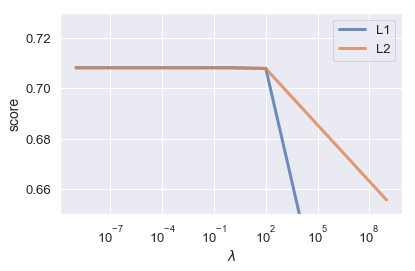

In [19]:
C = [1/1e9, 1/1e2, 1/1, 1/1e-2, 1/1e-9]

sns.set(font_scale=1.2)
sns.lineplot(x=C, y=y_l1_mean_plot, lw=3, alpha=.8, label='L1')
sns.lineplot(x=C, y=y_l2_mean_plot, lw=3, alpha=.8, label='L2')
plt.xscale("log")
plt.ylim(.65,.73)
plt.xlabel('$\lambda$',fontsize=14)
plt.ylabel('score',fontsize=14)
plt.tight_layout()
plt.legend()

# plt.savefig('img/Cscore_L1_L2');

From the graph above we concluded that **L1** and **L2** regularization give us the same scores for $\lambda$ lower than 100.<br>
> Moving forward we choose:
- **Logistic regression with ridge (l2) regularization**
- With **C-value = 100** (middle point of our testing range)

## Step 10: Logistic regression with Ridge(l2) regularization and C value of 100. 
logistic regression with ridge penalty and a nice confusion matrix plot

Confusion matrix, without normalization
Precision = 0.754
Recall = 0.617
Accuracy = 0.708
f1 score = 0.679


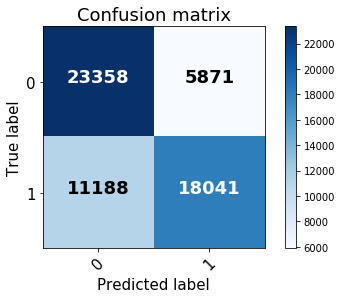

In [9]:
class_names = set(os_data_y)
l2_reg = LogisticRegression(C=100, solver='newton-cg', max_iter=1000, penalty='l2')
l2_reg.fit(X=os_data_X, y=os_data_y)
l2_reg_pred = l2_reg.predict(os_data_X)

# calculate confusion matrix using sklearn
conf_matrix = confusion_matrix(y_true=os_data_y, y_pred=l2_reg.predict(os_data_X))

# import our model
import logistic_regression_plots as lr_plot
lr_plot.plot_confusion_matrix(cm=conf_matrix, classes=class_names)
logistic_regression.print_metrics(y_train=os_data_y, y_hat=l2_reg.predict(os_data_X))
# plt.savefig('img/CM_train')

(0.13052105785350165, 0.5521228916487051, 0.55)
AUC: 0.78


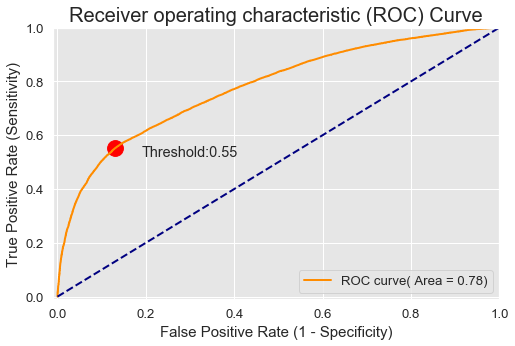

In [21]:
# minimizing cost
fpr, tpr, cost, thres = logistic_regression.minimize_cost(lr=l2_reg, X_train=os_data_X, y_train=os_data_y)
cost_idx = np.argmin(cost) # returns the minimum
min_cost_threshold = fpr[cost_idx], tpr[cost_idx], thres[cost_idx]
print(min_cost_threshold)

# plot the roc curve indicating the treshold
logit_roc_auc = roc_auc_score(os_data_y, l2_reg.predict(os_data_X))
fpr_lst, tpr_lst, thresholds = roc_curve(os_data_y, l2_reg.predict_proba(os_data_X)[:,1])
lr_plot.roc_curve(fpr_lst, tpr_lst, min_cost_threshold)

Average precision-recall score: 0.66


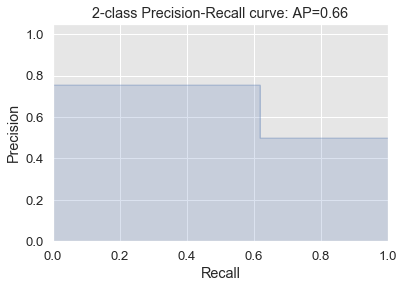

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

# l2_reg.fit(X=os_data_X, y=os_data_y)
y_score = l2_reg.predict(os_data_X)

precision, recall, _ = precision_recall_curve(os_data_y, y_score)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(os_data_y, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

## Step 11: Finding Optimum Threshold, Maximizing F1 Score
We calculated the optimum threshold with maximum f1-score and lower recall

In [2]:
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots()

# Load a binary classification dataset
X, y = os_data_X, os_data_y

# Instantiate the classification model and visualizer
l2_reg = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
visualizer = DiscriminationThreshold(l2_reg, exclude='queue_rate', is_fitted=True,ax=ax)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.finalize()

plt.tight_layout()
plt.legend()
plt.xlabel('Discrimination Threshold')
plt.ylabel('Score')
plt.savefig('img/Threshold')
plt.show()         # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

we then plot our confusion matrix using this calculated threshold value

Confusion matrix, without normalization
Precision = 0.754
Recall = 0.617
Accuracy = 0.708
f1 score = 0.679


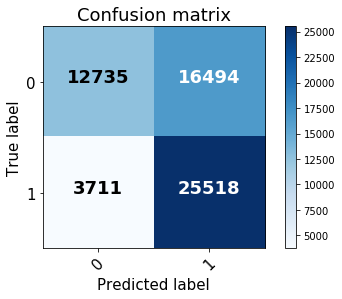

In [10]:
l2_reg.fit(X=os_data_X, y=os_data_y)
y_pred_034 = 1*(l2_reg.predict_proba(X=os_data_X)[:,1]>=0.34)
conf_matrix = confusion_matrix(y_true=os_data_y, y_pred=y_pred_034)
lr_plot.plot_confusion_matrix(cm=conf_matrix, classes=class_names)
logistic_regression.print_metrics(y_train=os_data_y, y_hat=l2_reg.predict(os_data_X))
# plt.savefig('img/CM_train_0.34')

## Step 12: Test Final Model With Test Data
we now are comfortable with our model and we are testing it on our test data

In [11]:
## Load Test data from data/Test
Test = pd.read_csv('data/Test.csv',)
X_test = Test.drop('target', axis = 1)
y_test = Test['target']
len(y_test)

8236

Confusion matrix, without normalization
Precision = 0.265
Recall = 0.596
Accuracy = 0.769
f1 score = 0.367


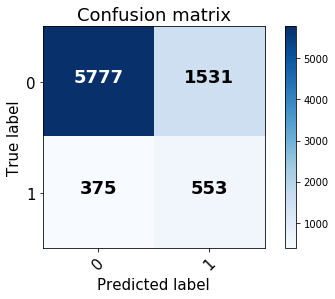

In [12]:
# scale the test dataset 
scaled_test = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_test, columns=columns)

# plot a test confustion matrix
y_pred_test = l2_reg.predict(X_test_scaled)
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
lr_plot.plot_confusion_matrix(cm=conf_matrix_test, classes=class_names)
logistic_regression.print_metrics(y_train=y_test, y_hat=y_pred_test)
# plt.savefig('img/CM_test')

With Optimum Threshold

Confusion matrix, without normalization
Precision = 0.158
Recall = 0.843
Accuracy = 0.476
f1 score = 0.266


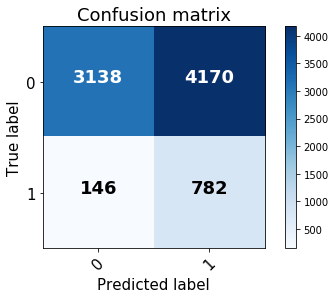

In [13]:
# l2_reg.fit(X=os_data_X, y=os_data_y)
y_test_pred= 1*(l2_reg.predict_proba(X=X_test_scaled)[:,1]>=0.34)
cm_test_threshold = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
lr_plot.plot_confusion_matrix(cm=cm_test_threshold, classes=class_names)
logistic_regression.print_metrics(y_train=y_test, y_hat=y_test_pred)
# plt.savefig('img/CM_test_threshold')

AUC: 0.761


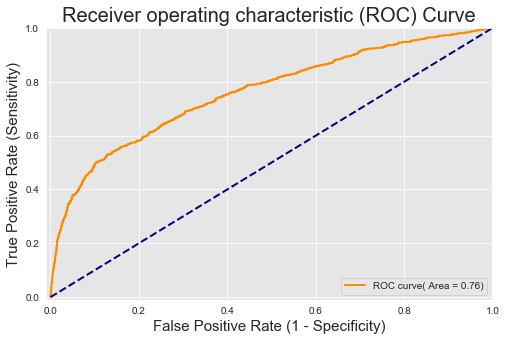

In [14]:
# plot the roc curve indicating the treshold
test_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, l2_reg.predict_proba(X_test_scaled)[:,1])
lr_plot.roc_curve_no_thres(fpr_test, tpr_test)

### ----- The End ----